In [8]:
# clear all # clear working console
%reset  # clears all variables.


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  clears, please run `%reset?` for details
Don't know how to reset  all, please run `%reset?` for details
Don't know how to reset  variables., please run `%reset?` for details


In [2]:
# import libraries
# for data manipulation
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

plt.style.use('classic')
plt.style.use('seaborn-whitegrid')

In [ ]:
# statistical and ML libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
import scipy.stats
from sklearn.metrics import mean_absolute_error

In [3]:
from os import chdir
chdir('/Users/elenizarogianni/Desktop/MLOps')


In [4]:
data = pd.read_csv('logfile.log')

# index data based on time
data = pd.read_csv('logfile.log', index_col=['time'], parse_dates=['time'])

server = '216.66.13.235:8088'
# filter based on server
srv = data.loc[data['server'] == server]

# get basic info on the dataset
srv.head(10)
srv.shape
srv.dtypes

# Describe numerical variables (mean,std etc.)
srv.describe()

,bw,requests,hits
count,8621.000000,8621.000000,8621.000000
mean,1508.394051,4816.208676,1593.166570
std,588.018169,1731.083660,804.699398
min,0.000000,0.000000,0.000000
25%,1154.783300,3735.000000,1044.000000
50%,1585.049900,5111.000000,1634.000000
75%,1933.229000,6080.000000,2142.000000
max,2819.162000,8241.000000,3728.000000


In [5]:
# drop irrelevant columns
drop_cols = ['type', 'server']
srv.drop(drop_cols, axis=1, inplace=True)
# check
srv.head()


/Users/elenizarogianni/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,bw,requests,hits
time,,,
1.589360e+12,427.17157,1957.0,230.0
1.589360e+12,427.17157,1957.0,230.0
1.589360e+12,421.83206,2084.0,256.0
1.589360e+12,421.83206,2084.0,256.0
1.589360e+12,418.20386,1891.0,306.0


In [6]:
# check for missing value, in all columns
srv.isnull().any().any()

# double-check for bandwidth
print(srv.bw.isnull().sum())


0


In [ ]:
# Correct time variable
# From unix timestamp to date-time timestamp

from datetime import datetime
indexes=srv.index

indexes = pd.DataFrame(data=srv.index)
new_indexes =[] 

# For each row in time,
for row in indexes.index:
    new_indexes.append(indexes.loc[row]/1000)
    
srv = srv.set_index(indexes)
srv.index

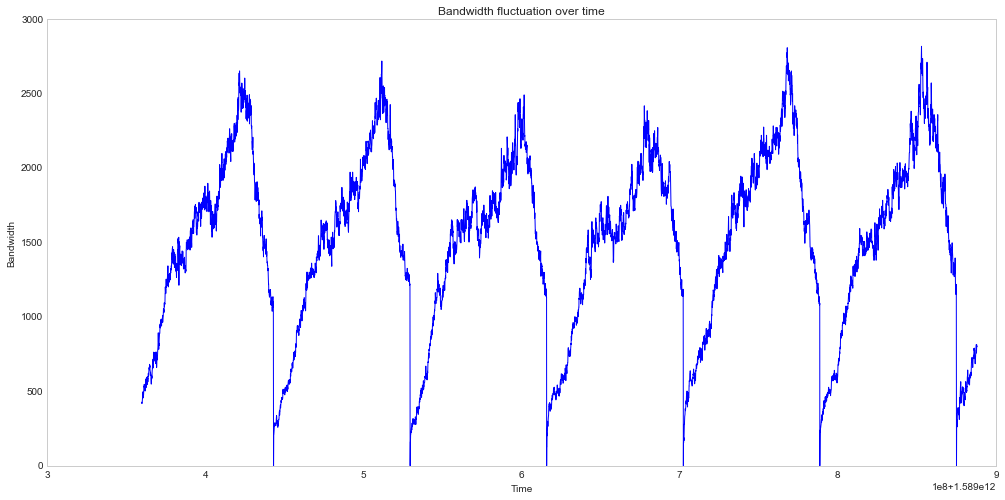

In [7]:
# Plot bandwidth
plt.figure(figsize=(17, 8))
plt.plot(srv.bw)
plt.title('Bandwidth fluctuation over time')
plt.ylabel('Bandwidth')
plt.xlabel('Time')
plt.grid(False)
plt.show()

In [ ]:
# test stationarity of data, i.e. statistical properties don't change over-time.
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(srv.bw, lags=30)

In [ ]:
# Take the first difference to make the process stationary
# !!!! plug away with options for lag.
data_diff = srv.bw - srv.bw.shift(1)
tsplot(data_diff[1:], lags=30)

In [ ]:
## OR Box-Jenkins model to transform data for stationarity.




In [ ]:
# conduct a Durbin-Watson Test to further explore auto-correlation


In [ ]:
# 1. Normalize data, using [min max]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
# 2. Standardize data  data, using mean, variance
# Questionmark: does it work well witn non-stationary data? -->doubtfull, explore further

from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from math import sqrt


In [ ]:
# 1. conduct basic time-series modelling techniques


In [ ]:

# 1a. moving average

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(srv.bw, 100)  # the longer the window the smoother the trend.



In [ ]:
# 1b. ARIMA 





In [ ]:
# 1c. SARIMA (incorporates seasonality element, therefore input raw, uncorrected for seasonality data)
 


    
    
    
    

In [ ]:
# 2 LSTM
# as done by Vlontzos --> done in vlontzos.py (incorporate however here later!)





In [ ]:
################### performance metrics for LSTM: MSE, RMSE and R2

## MSE
import sklearn
from sklearn.metrics import mean_squared_error
mse = sklearn.metrics.mean_squared_error(Yy, yhat, multioutput='uniform_average')

# περιεργο mse δινει πισω.
mse = 2570.924589949453 

# Mean Squared Error in numpy
import numpy as np
MSE = np.square(np.subtract(Yy,yhat)).mean() # edw dinei allo apotelesma, 767979.0512846907 ???

# Claculate error yourself, due to inconsistency shown above
# calculate error
err = (expected[i] - predicted[i])**2
# example of increase in mean squared error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = Yy
# predicted value
predicted = yhat
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
    
# add all the squared errors up
squared_error
 
# find the mean of the squared error
mse=squared_error/yhat.size
    
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()


## RMSE- root MSE assure same metrics are maintained, e.g. dollars and predict dollars
rmse = mean_squared_error(Yy, yhat, squared=False)


#R2 - explained variance
# R2 value will increase by increasing the number of features.
from sklearn.metrics import r2_score
r2_score(Yy, yhat)   #  0.9933667463020615 



In [ ]:
# 2i. LSTM with cross-validation

# Optimal step count



# Optimal LSTM hyper-parameters






In [ ]:
### Plot comparative table for ARIMA, SARIMA, LSTM (basic and cross-validated one)





In [ ]:
### Advance techniques for pre-processing and feature engineering



